<a href="https://colab.research.google.com/github/DimpleDR/Computational-Data-Science/blob/Projects/M6_SNB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

**DISCLAIMER:** THIS NOTEBOOK IS PROVIDED ONLY AS A REFERENCE SOLUTION NOTEBOOK FOR THE MINI-PROJECT. THERE MAY BE OTHER POSSIBLE APPROACHES/METHODS TO ACHIEVE THE SAME RESULTS.

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

##<b><font color="red">Please run this solution notebook on your Google Colab T4 GPU runtime</font></b>

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [3]:
images_data = glob.glob("/content/FullIJCNN2013/*/*.ppm")
len(images_data), images_data[0]

(1213, '/content/FullIJCNN2013/22/00003.ppm')

In [4]:
features, labels = [], []
for i in images_data:
    try:
        img = Image.open(i)
        img = img.resize((30,30))#.reshape(30*30*3)
        labels.append(int(i.split("/")[3]))
        features.append(np.array(img))
    except:
        pass

In [5]:
features[0].shape

(30, 30, 3)

In [6]:
features1 = np.array([i.reshape(-1) for i in features])
features1.shape

(1213, 2700)

In [7]:
n_classes = len(set(labels))
n_classes

43

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

(80, 77, 3)

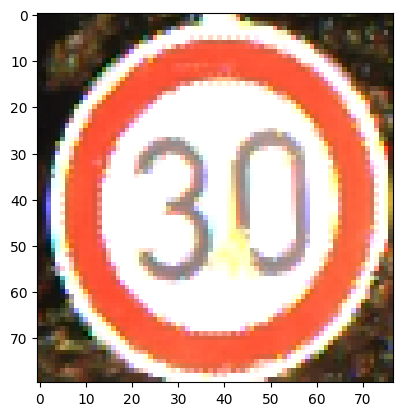

In [8]:
plt.imshow(imread('/content/FullIJCNN2013/01/00002.ppm'))
imread('/content/FullIJCNN2013/01/00002.ppm').shape

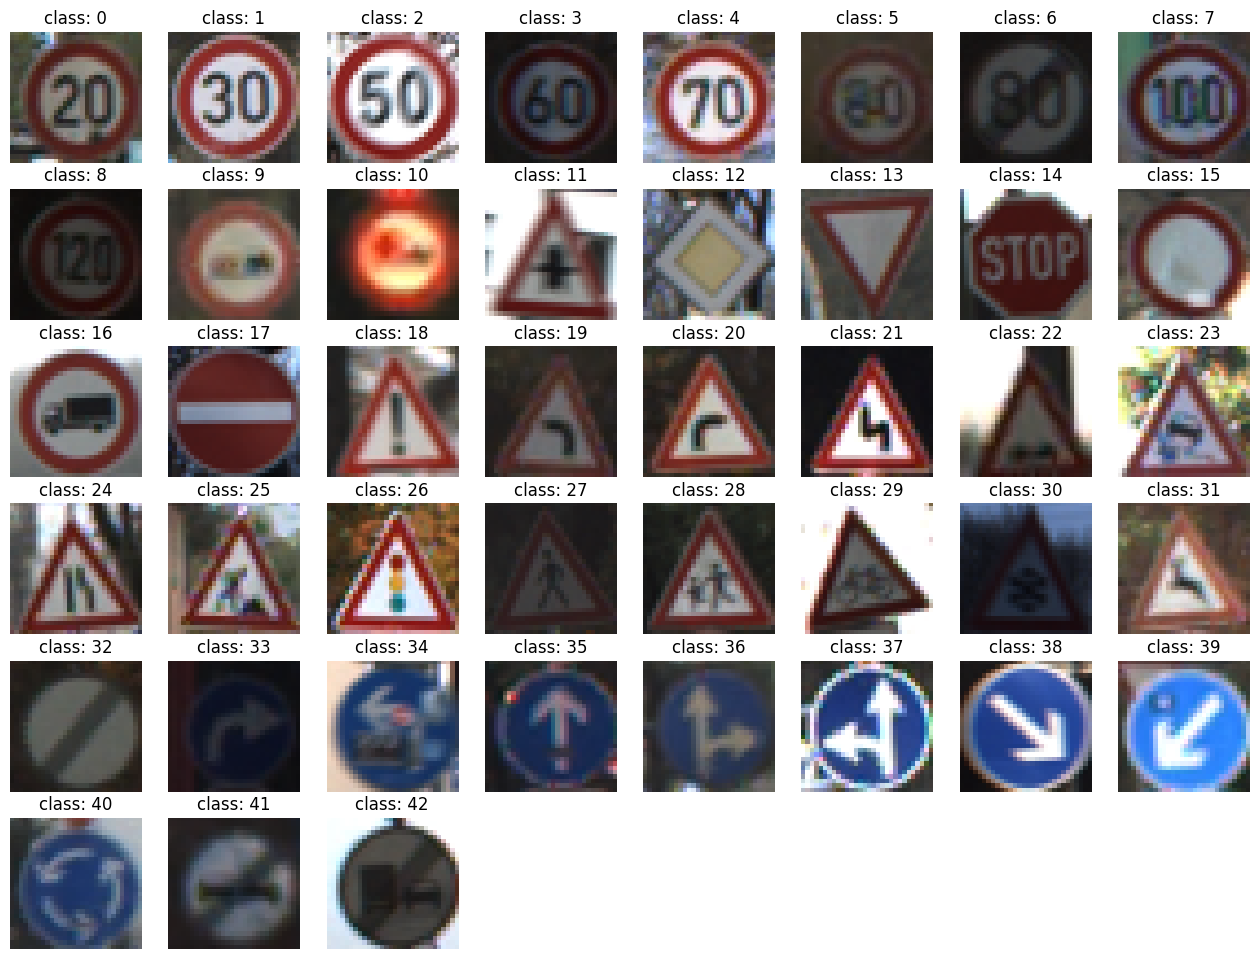

In [9]:
targets = np.array(labels)
plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = np.random.choice(np.where(targets == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(features[i])

#### Plot the distribution of Classes

Text(0.5, 1.0, 'histogram')

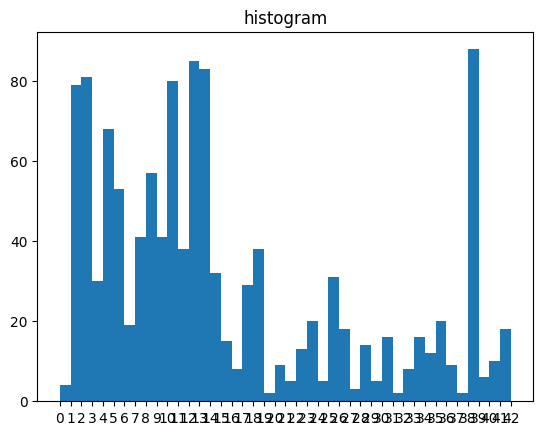

In [10]:
# Visulization of the histogram
images_per_class, bins, _ = plt.hist(labels,bins=range(n_classes))
plt.xticks(range(n_classes))
plt.title('histogram')

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [11]:
features_norm = preprocessing.normalize(features1, norm='l2')
features_norm.shape

(1213, 2700)

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(features_norm), np.array(labels), test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((970, 2700), (243, 2700), (970,), (243,))

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV and select best parameters

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [13]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(450,225,100,50), (100,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

<b><font color="red">The following code cell will take execution time ~ 8 mins on GPU</font></b>


In [14]:
#clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=2)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(450, 225, 100, 50),
                                                (100, 100, 50), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [15]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (450, 225, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [16]:
mlp = MLPClassifier(activation='tanh',momentum=0.99,alpha=0.0001,max_iter=1000,
                    hidden_layer_sizes=(450,225,100, 50),learning_rate='adaptive',solver='adam')
mlp.fit(X_train, Y_train)
mlp.score(X_test, Y_test)

0.8847736625514403

#### Classification report (only for internal purpose)

In [17]:
pred_test = mlp.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86        12
           2       0.94      0.76      0.84        21
           3       0.67      0.50      0.57         4
           4       1.00      1.00      1.00        13
           5       0.75      1.00      0.86        12
           6       0.67      1.00      0.80         2
           7       0.78      1.00      0.88         7
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        13
          11       0.88      1.00      0.93         7
          12       0.88      1.00      0.94        22
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.50      1.00      0.67         1
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [18]:
metrics.confusion_matrix(Y_test, pred_test)

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  9,  0, ...,  0,  0,  0],
       [ 0,  0, 16, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

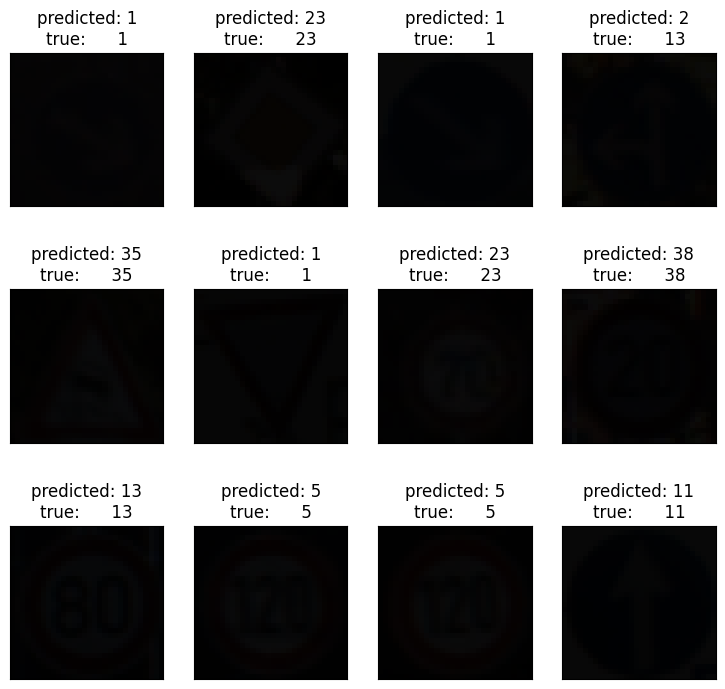

In [19]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w,3)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(pred_test, Y_test, Y_test, i)
                     for i in range(pred_test.shape[0])]

plot_gallery(X_test, prediction_titles, 30, 30)

#### Use RandomSearchCV to search the hyper parameters

<b><font color="red">The following code cell will take execution time ~ 5 mins on GPU</font></b>

In [20]:
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPClassifier(early_stopping=True)
randomCV = RandomizedSearchCV(mlp,parameter_space)
search = randomCV.fit(X_train, Y_train)
search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (450, 225, 100, 50),
 'alpha': 0.0001,
 'activation': 'relu'}

#### Try the different algorithms and compare the results with MLP classifier

In [21]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [22]:
!pip install  xgboost
from xgboost import XGBClassifier

In [23]:
# Decision Tree
dt_model_team = tree.DecisionTreeClassifier(random_state=42)
dt_model_team = dt_model_team.fit(X_train, Y_train)
dt_model_team.score(X_test, Y_test), dt_model_team.score(X_train, Y_train)

(0.5596707818930041, 1.0)

In [24]:
# Random Forest
rf_model_team = RandomForestClassifier(max_depth=10, n_estimators=250,criterion='entropy',random_state=42)
rf_model_team.fit(X_train, Y_train)
rf_model_team.score(X_test, Y_test), rf_model_team.score(X_train, Y_train)

(0.8395061728395061, 1.0)

In [25]:
#Linear SVC
Lsvm = LinearSVC(random_state=0, tol=1e-5)
Lsvm.fit(X_train, Y_train)
Lsvm.score(X_test, Y_test)

0.7818930041152263

In [26]:
svm_clf = SVC(kernel="rbf",C=1.0)
svm_clf.fit(X_train, Y_train)
svm_clf.score(X_test, Y_test)

0.7160493827160493

In [27]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb.score(X_test, Y_test)

0.7613168724279835

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [28]:
print(tf.__version__) # 1.12.0

2.17.1


In [29]:
# Step 1 - Build the architecture
# Model a simple 3-layer neural network
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(1350, activation=tf.nn.relu),
    keras.layers.Dense(675, activation=tf.nn.relu),
    keras.layers.Dense(43, activation=tf.nn.softmax)
])
nn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2700)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1350)                │       3,646,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 675)                 │         911,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │          29,068 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,587,343 (17.50 MB)

 Trainable params: 4,587,343 (17.50 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
np.array(X_train).shape, Y_train.shape, len(set(labels))

((970, 2700), (970,), 43)

In [31]:
# Step 2 - Compile the model
nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.0677 - loss: 3.5158
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2088 - loss: 3.1071
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3323 - loss: 2.5097
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4014 - loss: 2.0585
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4764 - loss: 1.7078
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5455 - loss: 1.5007
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6042 - loss: 1.3385
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 1.2244
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 1.0387
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7264 - loss: 0.9251
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7806 - loss: 0.8040
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - l

In [33]:
nn_model.evaluate(X_test, Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7820 - loss: 0.7333


[0.6555255055427551, 0.806584358215332]

#### Try the same parameters used for MLP Classifier and build the keras model

In [34]:
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(450, activation=tf.nn.tanh),
    keras.layers.Dense(225, activation=tf.nn.tanh),
    keras.layers.Dense(100, activation=tf.nn.tanh),
    keras.layers.Dense(50, activation=tf.nn.softmax)
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.0957 - loss: 3.5434
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2646 - loss: 2.8808
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3862 - loss: 2.2933
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5345 - loss: 1.7739
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5697 - loss: 1.5116
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6319 - loss: 1.2555
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7081 - loss: 1.0543
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7618 - loss: 0.9376
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7581 - loss: 0.8299
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8403 - loss: 0.6622
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.5917
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - l

In [35]:
nn_model.evaluate(X_test, Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8405 - loss: 0.6440


[0.6228020787239075, 0.8395061492919922]

#### Experiment using Dropout, Regularization and Batch Normalization

In [36]:
# With Regularization and DropOut and BatchNormalization
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(1350, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(675, activation=tf.nn.relu),
    Dropout(rate=0.1),
    BatchNormalization(),
    keras.layers.Dense(43, activation=tf.nn.softmax)
])

nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.2698 - loss: 16.8966
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6105 - loss: 4.8911
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7091 - loss: 2.1693
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7808 - loss: 1.5259
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8217 - loss: 1.2177
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 1.1521
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 1.0064
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8545 - loss: 1.0519
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8344 - loss: 1.0371
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8568 - loss: 0.9802
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.9472
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - 

In [37]:
nn_model.evaluate(X_test, Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6577 - loss: 1.7199


[1.7225359678268433, 0.6707819104194641]

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

In [38]:
predict_test = nn_model.predict(X_test)
predict_test = np.argmax(predict_test,axis=1)
predict_test

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([38, 12, 38, 35, 23, 13,  4,  1,  1,  8,  8, 35, 23,  1,  5,  4,  1,
        8,  9, 26,  1, 30, 17, 35, 38,  1,  9, 12,  6, 12,  1, 16, 12,  1,
       24, 23,  7, 13,  1, 12, 38,  4,  4, 12,  1, 23,  3, 35, 12,  6, 28,
       11, 13,  4, 26,  1, 23, 23, 38,  4,  6,  4, 17, 12,  4, 11, 23,  7,
       38, 41, 22,  1, 35, 28, 42, 12, 41, 42, 13, 13,  4,  4,  4, 26,  1,
        4,  1,  8, 22,  8,  1, 26,  1, 13, 42,  1, 13, 23, 36, 38,  8,  4,
       38, 24, 10,  1,  4, 22, 12, 42, 13, 12, 38,  4, 10, 13, 20,  6,  1,
       13, 38,  1, 23, 22, 10, 20,  4, 10, 20, 39, 25, 12,  1,  8, 20,  1,
       35, 10,  1,  7, 35, 11,  9, 12, 26,  1,  8, 13,  4, 14, 14, 10,  1,
       38, 38,  1,  9,  3, 12,  6,  4,  1,  1,  9, 38,  1,  4, 38, 26, 23,
       38,  8,  4,  1, 13,  1,  4,  1,  2,  4, 38,  4, 13,  8, 13,  4, 13,
        1, 20,  7, 38, 10, 10, 42, 12,  9, 23, 13,  1, 20, 26, 17, 12,  7,
       38, 11, 12, 12, 26,  1,  1, 38,  4, 39, 13, 15, 38,  9, 38,  7, 35,
       12, 10, 26, 13,  4

In [39]:
metrics.confusion_matrix(Y_test, predict_test)

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0, 16,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [40]:
print(metrics.classification_report(Y_test, predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.26      0.83      0.39        12
           2       1.00      0.05      0.09        21
           3       1.00      0.50      0.67         4
           4       0.46      1.00      0.63        13
           5       1.00      0.08      0.15        12
           6       0.40      1.00      0.57         2
           7       1.00      0.86      0.92         7
           8       1.00      0.67      0.80        15
           9       1.00      1.00      1.00         7
          10       1.00      0.77      0.87        13
          11       1.00      0.71      0.83         7
          12       0.91      0.91      0.91        22
          13       0.86      0.95      0.90        19
          14       1.00      0.60      0.75         5
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         1
          17       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.